In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
import keras

In [ ]:
# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header #set the header row as the df header

In [2]:
data=pd.read_csv("pima-indians-diabetes.csv")

### Input Variables (X):

#### Number of times pregnant
#### Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### Diastolic blood pressure (mm Hg)
#### Triceps skin fold thickness (mm)
#### 2-Hour serum insulin (mu U/ml)
#### Body mass index (weight in kg/(height in m)^2)
#### Diabetes pedigree function
#### Age (years)

## Output Variables (y):

#### Class variable (0 or 1)


In [3]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
columns=['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)',
        '2-Hour serum insulin (mu U/ml)','Body mass index','Diabetes pedigree function','Age (years)','Class variable (0 or 1)']

In [5]:
data.columns=columns

In [6]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [33]:
data.corr()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
Number of times pregnant,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Plasma glucose concentration,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
Diastolic blood pressure (mm Hg),0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
Triceps skin fold thickness (mm),-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
2-Hour serum insulin (mu U/ml),-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
Body mass index,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
Diabetes pedigree function,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age (years),0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Class variable (0 or 1),0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


<AxesSubplot:>

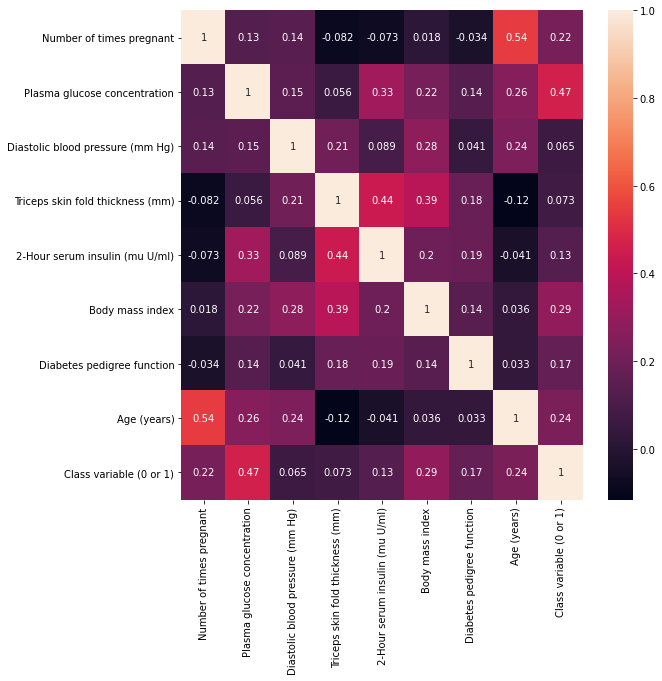

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)

In [7]:
# split into input (X) and output (y) variables
X = data.iloc[:,0:8]
Y = data.iloc[:,8]

In [8]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [9]:
X_sc=sc.fit_transform(X)

In [10]:
X_sc=pd.DataFrame(X_sc)

In [11]:
print(X_sc)

            0         1         2         3         4         5         6  \
0   -0.843726 -1.122086 -0.160249  0.532023 -0.693559 -0.683729 -0.364265   
1    1.234240  1.944476 -0.263578 -1.286882 -0.693559 -1.102301  0.604701   
2   -0.843726 -0.996920 -0.160249  0.155698  0.122357 -0.493469 -0.919684   
3   -1.140579  0.505069 -1.503534  0.908349  0.764674  1.409132  5.482732   
4    0.343683 -0.152051  0.253070 -1.286882 -0.693559 -0.810569 -0.817052   
..        ...       ...       ...       ...       ...       ...       ...   
762  1.827945 -0.621423  0.356400  1.723720  0.868833  0.115363 -0.907610   
763 -0.546874  0.035698  0.046411  0.406582 -0.693559  0.610039 -0.397469   
764  0.343683  0.004406  0.149740  0.155698  0.278596 -0.734465 -0.684235   
765 -0.843726  0.160863 -0.470238 -1.286882 -0.693559 -0.239789 -0.370302   
766 -0.843726 -0.871754  0.046411  0.657465 -0.693559 -0.201737 -0.472934   

            7  
0   -0.188940  
1   -0.103795  
2   -1.040393  
3   -0.0186

In [18]:
X_sc.columns=X.columns

In [19]:
X_sc.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years)
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_sc,Y,test_size=0.25,random_state=42)

In [21]:
...
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
# fit the keras model on the dataset
history=model.fit(x_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7722
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7722
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7774
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7791
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7774
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7791
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7809
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7774
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7774
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7826
Epoch 11/50
6/6 [======================

In [42]:
# evaluate the keras model
Loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss %.2f' % Loss)

6/6 [==============================] - 0s 1000us/step - loss: 0.4899 - accuracy: 0.7656
Accuracy: 76.56
Loss 0.49


In [43]:
# make probability predictions with the model
predictions = model.predict(x_test)
# round predictions 
rounded_predictions = [round(x[0]) for x in predictions]

In [44]:
print(rounded_predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [ ]:
# # make class predictions with the model
# prediction = model.predict_classes(X)

In [45]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


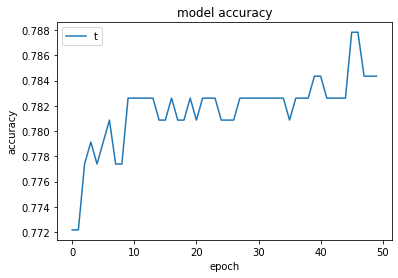

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('test', loc='upper left')
plt.show()

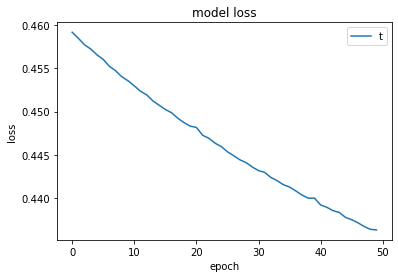

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('test', loc='upper right')
plt.show()